In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/avena/Desktop/college/sp24/dt/walmart/dtxwalmart/0221_0923_no_franchise_data.csv')
df.info()

/var/folders/lj/ql9slz_51jx619h3yw2xw0n80000gn/T/ipykernel_57653/730976984.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/avena/Desktop/college/sp24/dt/walmart/dtxwalmart/0221_0923_no_franchise_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286659 entries, 0 to 286658
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0.1    286659 non-null  int64  
 1   Unnamed: 0      286659 non-null  int64  
 2   Location ID     286659 non-null  int64  
 3   Location Name   286659 non-null  object 
 4   Address         286659 non-null  object 
 5   Provider        244673 non-null  object 
 6   Trade           244673 non-null  object 
 7   Category        244673 non-null  object 
 8   ProblemCode     244673 non-null  object 
 9   Tonnage         286659 non-null  float64
 10  Completed Date  286659 non-null  object 
 11  Region          244673 non-null  float64
 12  District        244673 non-null  float64
 13  Priority        23881 non-null   object 
 14  Zip code        41986 non-null   float64
 15  City            286659 non-null  object 
 16  State           286659 non-null  object 
 17  Latitude  

<div style="font-size: 25px;">
Splitting data into supercenter and non-supercenter locations, taking out 0s in tonnage
<div>

In [3]:
def split_supercenter(df):
    supercenter_df = df[df['Location Name'].str.contains('Supercenter')]
    non_supercenter_df = df[~df['Location Name'].str.contains('Supercenter')]
    return supercenter_df, non_supercenter_df

supercenter_df, non_supercenter_df = split_supercenter(df)



In [4]:
supercenter_df

,Unnamed: 0.1,Unnamed: 0,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
0,9110,9110,5051,WM Supercenter,920 47TH AVE,NaN,NaN,NaN,NaN,3.51,2021-02-01,NaN,NaN,NaN,80634.0,GREELEY,CO,40.422824,-104.754675
1,9111,9111,1370,WM Supercenter,2840 HIGHWAY 95,NaN,NaN,NaN,NaN,7.48,2021-02-01,NaN,NaN,NaN,86442.0,BULLHEAD CITY,AZ,35.082515,-114.594161
2,9113,9113,3620,WM Supercenter,13502 HAMILTON VIEW RD,NaN,NaN,NaN,NaN,8.78,2021-02-01,NaN,NaN,NaN,84065.0,RIVERTON,UT,40.505236,-111.977516
4,9115,9115,2767,WM Supercenter,4505 E MCKELLIPS RD,NaN,NaN,NaN,NaN,8.49,2021-02-01,NaN,NaN,NaN,85215.0,MESA,AZ,33.449221,-111.733746
5,9116,9116,3799,WM Supercenter,240 W BASELINE RD,NaN,NaN,NaN,NaN,7.58,2021-02-01,NaN,NaN,NaN,85210.0,MESA,AZ,33.380761,-111.836721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286650,364990,364990,4200,Supercenter FS Reg 33A-7 Rod Stephens,6475 GATEWAY ROAD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,1.94,2023-09-01,14.0,16.0,Scheduled Service,NaN,COLUMBUS,GA,32.538555,-84.876784
286651,364991,364991,1225,Supercenter FS Reg 34A-2 Eric Sherman,899 BLANDING BLVD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,4.26,2023-09-01,3.0,101.0,Scheduled Service,NaN,ORANGE PARK,FL,30.137721,-81.768891
286653,364993,364993,2966,Supercenter FS Reg 24E-7 Daniel Duffy,222 SMOKERISE DR,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2.17,2023-09-01,20.0,215.0,Scheduled Service,NaN,WADSWORTH,OH,41.052608,-81.724969
286657,364997,364997,2071,Supercenter FS Reg 1M-1 Tim Weaver,8900 OLD SEWARD HWY,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,5.66,2023-09-01,60.0,469.0,Scheduled Service,NaN,ANCHORAGE,AK,61.140195,-149.869863


In [5]:
non_supercenter_df

,Unnamed: 0.1,Unnamed: 0,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
3,9114,9114,6090,Grocery,5400 W HIGHWAY 83,NaN,NaN,NaN,NaN,10.60,2021-02-01,NaN,NaN,NaN,84307.0,CORINNE,UT,41.560951,-112.143230
15,9127,9127,3845,Neighborhood Market,6645 W PEORIA AVE,NaN,NaN,NaN,NaN,9.07,2021-02-01,NaN,NaN,NaN,85302.0,GLENDALE,AZ,33.580224,-112.201923
16,9128,9128,6426,Sam's Club,2919 MARKET PL,NaN,NaN,NaN,NaN,7.63,2021-02-01,NaN,NaN,NaN,67401.0,SALINA,KS,38.785987,-97.608815
18,9130,9130,6683,Sam's Club,6525 S STATE ST,NaN,NaN,NaN,NaN,9.24,2021-02-01,NaN,NaN,NaN,84107.0,MURRAY,UT,40.630417,-111.886622
19,9131,9131,6019,Regional,7500 E CROSSROADS BLVD,NaN,NaN,NaN,NaN,5.13,2021-02-01,NaN,NaN,NaN,80538.0,LOVELAND,CO,40.432930,-104.970770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286635,364973,364973,2465,Neighborhood Market FS Reg 33A-6 Rod Stephens,3697 WINDSOR SPRING RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,0.00,2023-09-01,59.0,554.0,Scheduled Service,NaN,HEPHZIBAH,GA,33.378783,-82.073098
286652,364992,364992,5344,Walmart FS Reg 44F-1 Josh Thaxton,1238 PUTTY HILL AVE STE 5,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,7.28,2023-09-01,75.0,281.0,Scheduled Service,NaN,TOWSON,MD,39.395207,-76.580363
286654,364994,364994,3478,Walmart FS Reg 2M-5 Nick Paladino,700 KEEAUMOKU ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,1.02,2023-09-01,57.0,470.0,Scheduled Service,NaN,HONOLULU,HI,21.294903,-157.843233
286655,364995,364995,5274,Walmart FS Reg 2M-5 Nick Paladino,1131 KUALA ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,3.03,2023-09-01,57.0,470.0,Scheduled Service,NaN,PEARL CITY,HI,21.397174,-157.974452


In [6]:
def drop_zero_tonnage_rows(df):
    df = df[df['Tonnage'] != 0]
    return df

supercenter_df = drop_zero_tonnage_rows(supercenter_df)
non_supercenter_df = drop_zero_tonnage_rows(non_supercenter_df)

<div style="font-size: 25px;">
Plotting the distribution of tonnages in supercenter and non-supercenter locations
<div>

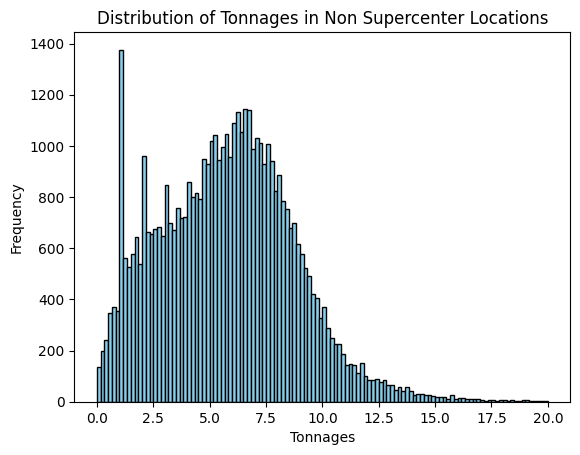

In [7]:
plt.hist(non_supercenter_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Non Supercenter Locations')
plt.show()

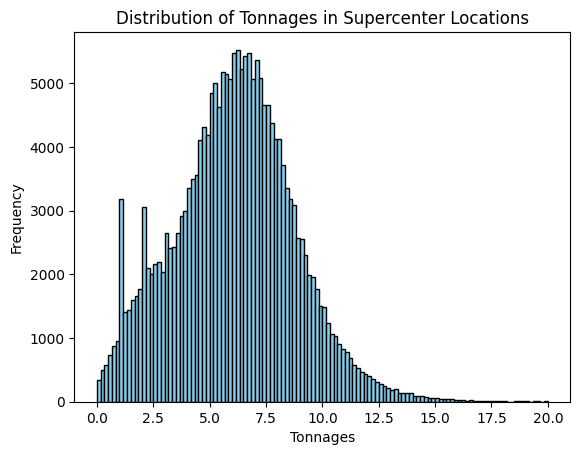

In [8]:
plt.hist(supercenter_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Supercenter Locations')
plt.show()

In [9]:
regular_walmart_df = non_supercenter_df[~non_supercenter_df['Location Name'].str.contains('Neighborhood')]
neighborhood_walmart_df = non_supercenter_df[non_supercenter_df['Location Name'].str.contains('Neighborhood')]


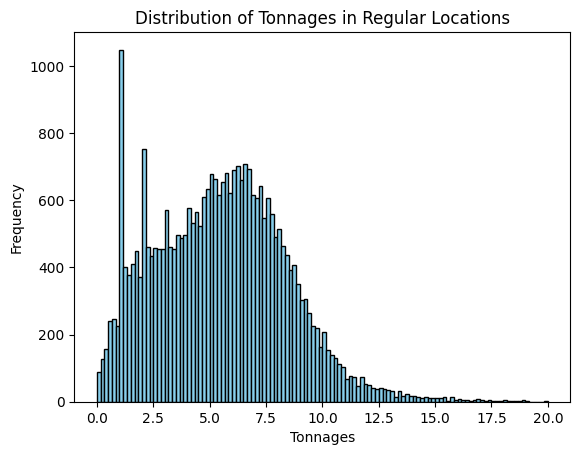

In [10]:
plt.hist(regular_walmart_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Regular Locations')
plt.show()

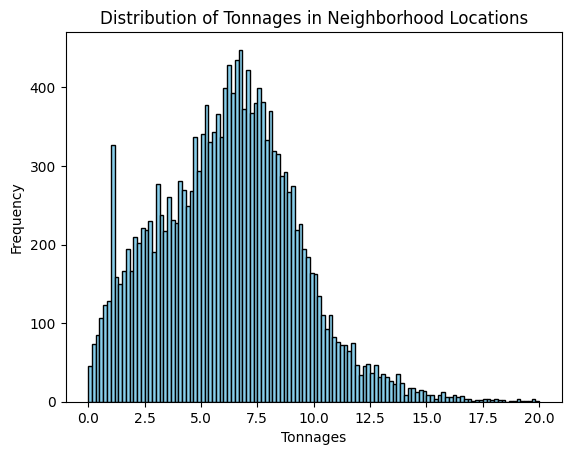

In [11]:
plt.hist(neighborhood_walmart_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Neighborhood Locations')
plt.show()

<div style="font-size: 25px;">
Ermmm guys there seems to be no difference between regular and neighborhood walmart locations 🤓. However, supercenter locations seem to have more normally distributed tonnages than non-supercenter locations!!
<div>

In [12]:
non_supercenter_df['Completed Date'] = pd.to_datetime(non_supercenter_df['Completed Date'])
supercenter_df['Completed Date'] = pd.to_datetime(supercenter_df['Completed Date'])

/var/folders/lj/ql9slz_51jx619h3yw2xw0n80000gn/T/ipykernel_57653/3524380976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df['Completed Date'] = pd.to_datetime(non_supercenter_df['Completed Date'])
/var/folders/lj/ql9slz_51jx619h3yw2xw0n80000gn/T/ipykernel_57653/3524380976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df['Completed Date'] = pd.to_datetime(supercenter_df['Completed Date'])


<div style="font-size: 25px;">
adding new column: days since last pickup
<div>

In [40]:
supercenter_df['Days Since Last Pickup'] = supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
supercenter_df.drop(columns = ['Unnamed: 0'])

/var/folders/lj/ql9slz_51jx619h3yw2xw0n80000gn/T/ipykernel_57653/1173104826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df['Days Since Last Pickup'] = supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
/var/folders/lj/ql9slz_51jx619h3yw2xw0n80000gn/T/ipykernel_57653/1173104826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)


,Unnamed: 0.1,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude,Days Since Last Pickup
1416,11032,1,Supercenter FM Reg 10-9 INSOURCE,2110 W WALNUT ST,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,8.90,2021-02-05,42.0,323.0,NaN,NaN,ROGERS,AR,36.331300,-94.149054,NaN
2201,11936,1,WM Supercenter,2110 W WALNUT ST,NaN,NaN,NaN,NaN,9.15,2021-02-08,NaN,NaN,NaN,72756.0,ROGERS,AR,36.331300,-94.149054,3.0
4673,14950,1,WM Supercenter,2110 W WALNUT ST,NaN,NaN,NaN,NaN,5.32,2021-02-19,NaN,NaN,NaN,72756.0,ROGERS,AR,36.331300,-94.149054,11.0
6659,17549,1,WM Supercenter,2110 W WALNUT ST,NaN,NaN,NaN,NaN,5.61,2021-02-26,NaN,NaN,NaN,72756.0,ROGERS,AR,36.331300,-94.149054,7.0
9073,20612,1,WM Supercenter,2110 W WALNUT ST,NaN,NaN,NaN,NaN,6.69,2021-03-08,NaN,NaN,NaN,72756.0,ROGERS,AR,36.331300,-94.149054,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243842,310594,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,7.05,2023-05-06,5.0,583.0,NaN,NaN,DALLAS,TX,32.963381,-96.770249,17.0
249592,317949,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,8.85,2023-05-24,5.0,583.0,NaN,NaN,DALLAS,TX,32.963381,-96.770249,18.0
261364,332862,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,12.92,2023-06-28,5.0,583.0,Scheduled Service,NaN,DALLAS,TX,32.963381,-96.770249,35.0
266386,339191,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,8.74,2023-07-12,5.0,583.0,Scheduled Service,NaN,DALLAS,TX,32.963381,-96.770249,14.0


In [14]:
non_supercenter_df['Days Since Last Pickup'] = non_supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
non_supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
non_supercenter_df.drop(columns = ['Unnamed: 0'])

/var/folders/lj/ql9slz_51jx619h3yw2xw0n80000gn/T/ipykernel_57653/911910718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df['Days Since Last Pickup'] = non_supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
/var/folders/lj/ql9slz_51jx619h3yw2xw0n80000gn/T/ipykernel_57653/911910718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)


,Unnamed: 0.1,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude,Days Since Last Pickup
4713,15108,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,4.22,2021-02-19,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,NaN
14219,27190,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,8.28,2021-04-02,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,42.0
21761,36522,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,9.35,2021-05-08,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,36.0
27260,43399,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,1.96,2021-06-01,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,24.0
29934,46771,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,9.69,2021-06-22,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250756,319352,30095,Unknown,2403 SE J Street,NaN,NaN,NaN,NaN,13.38,2023-05-26,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.346243,-94.195376,120.0
255436,325218,30095,Unknown,2403 SE J Street,NaN,NaN,NaN,NaN,1.01,2023-06-09,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.346243,-94.195376,14.0
139743,181439,30099,Unknown,2914 SE I ST,NaN,NaN,NaN,NaN,10.79,2022-06-06,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.340990,-94.200230,NaN
193428,247041,30099,Unknown,2914 SE I ST,NaN,NaN,NaN,NaN,7.46,2022-11-25,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.340990,-94.200230,172.0


In [15]:
supercenter_avg_days = supercenter_df.groupby('Location ID')['Days Since Last Pickup'].mean()
supercenter_avg_days = pd.DataFrame(supercenter_avg_days)
supercenter_avg_days



,Days Since Last Pickup
Location ID,
1,8.292035
3,9.936170
7,8.423423
9,12.355263
10,10.388889
...,...
7301,11.392405
7324,11.734177
7326,11.961538


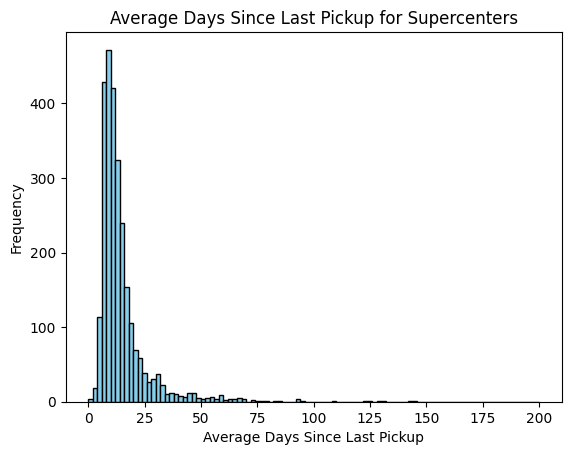

In [16]:
plt.hist(supercenter_avg_days['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Average Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Average Days Since Last Pickup for Supercenters')
plt.show()

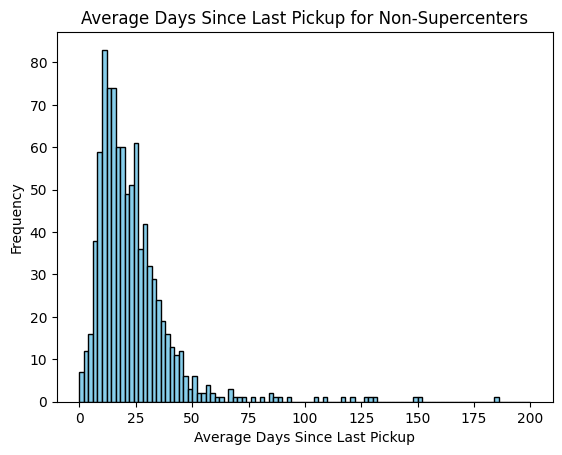

In [17]:
non_supercenter_avg_days = non_supercenter_df.groupby('Location ID')['Days Since Last Pickup'].mean()
non_supercenter_avg_days = pd.DataFrame( non_supercenter_avg_days)


plt.hist(non_supercenter_avg_days['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Average Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Average Days Since Last Pickup for Non-Supercenters')
plt.show()

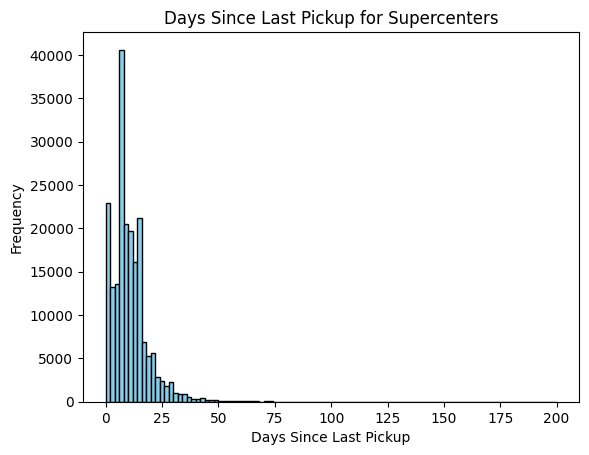

In [18]:
plt.hist(supercenter_df['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Days Since Last Pickup for Supercenters')
plt.show()

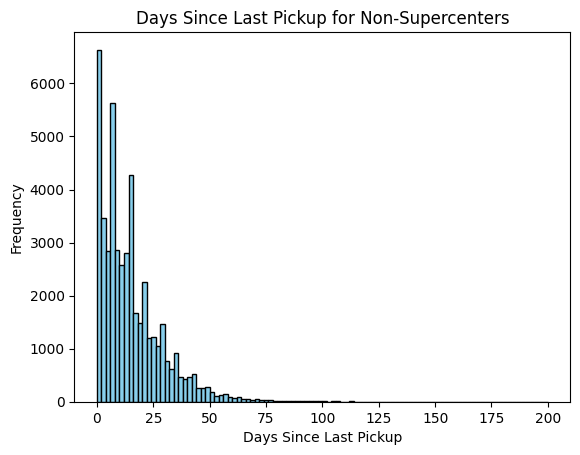

In [19]:
plt.hist(non_supercenter_df['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Days Since Last Pickup for Non-Supercenters')
plt.show()

<div style="font-size: 25px;">
Segmenting by years
<div>

In [20]:

supercenter_21 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2021]
supercenter_22 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2022]
supercenter_23 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2023]


In [21]:

non_supercenter_21 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2021]
non_supercenter_22 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2022]
non_supercenter_23 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2023]


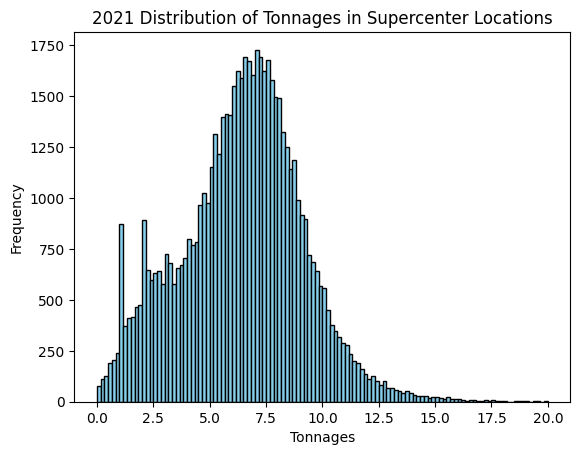

In [22]:
plt.hist(supercenter_21['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2021 Distribution of Tonnages in Supercenter Locations')
plt.show()

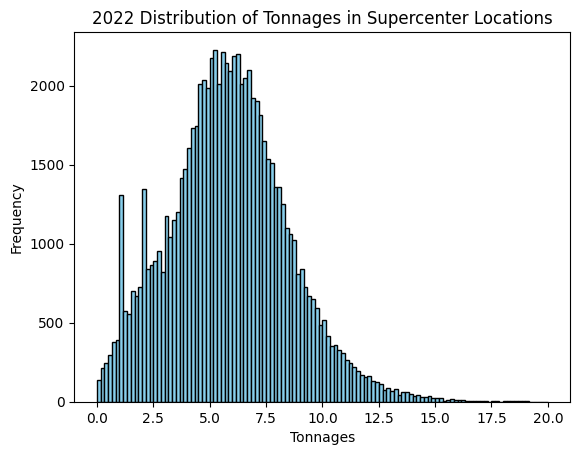

In [23]:
plt.hist(supercenter_22['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2022 Distribution of Tonnages in Supercenter Locations')
plt.show()

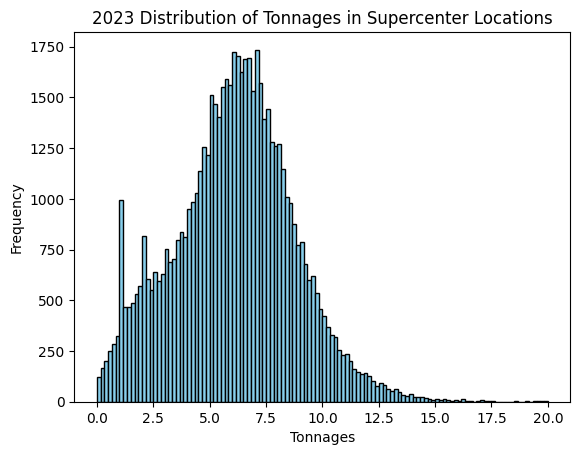

In [24]:
plt.hist(supercenter_23['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2023 Distribution of Tonnages in Supercenter Locations')
plt.show()

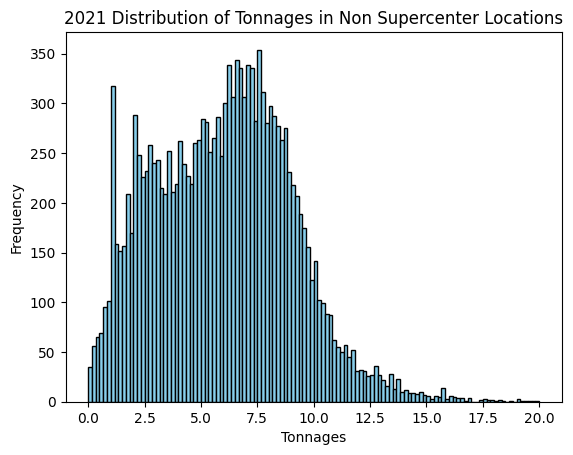

In [25]:
plt.hist(non_supercenter_21['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2021 Distribution of Tonnages in Non Supercenter Locations')
plt.show()

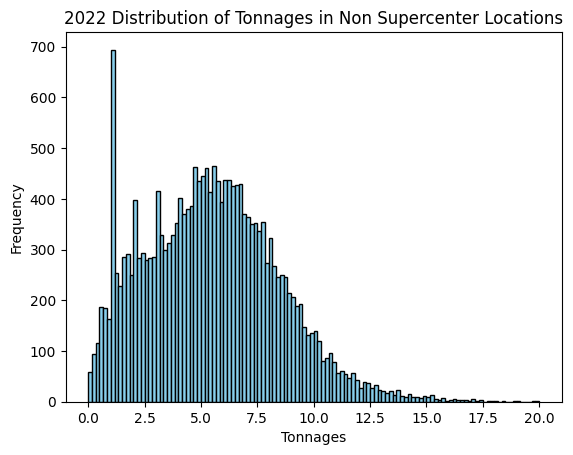

In [26]:
plt.hist(non_supercenter_22['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2022 Distribution of Tonnages in Non Supercenter Locations')
plt.show()

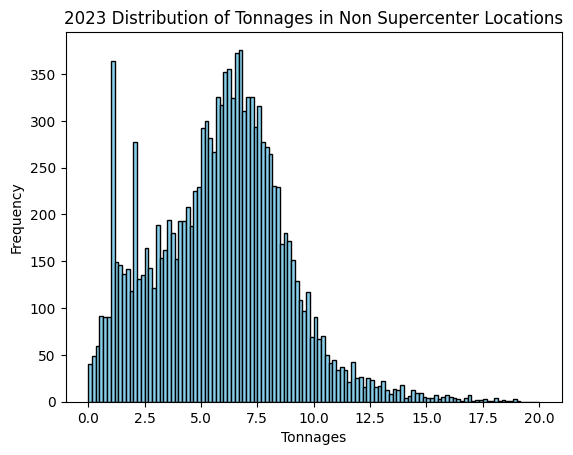

In [27]:
plt.hist(non_supercenter_23['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2023 Distribution of Tonnages in Non Supercenter Locations')
plt.show()

<div style="font-size: 25px;">
Searching for stores with consistent pickup schedules
<div>

[795, 1133, 1841, 2135, 3336, 3858, 5220]
Location ID: 795


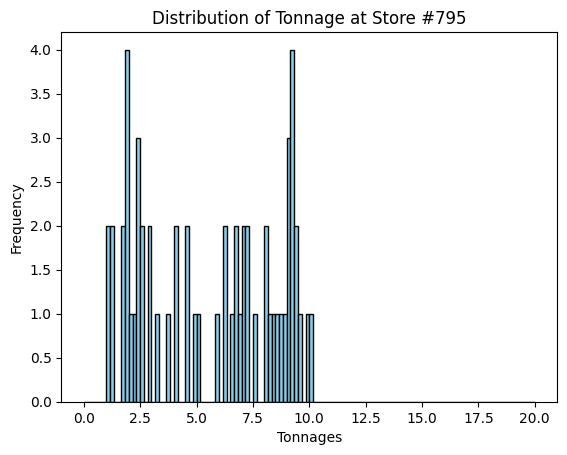

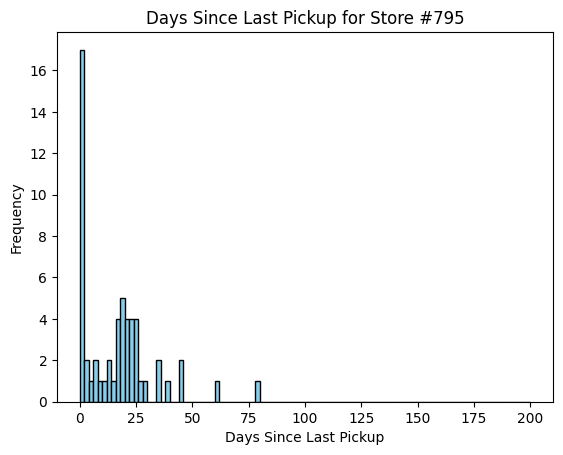

Location ID: 1133


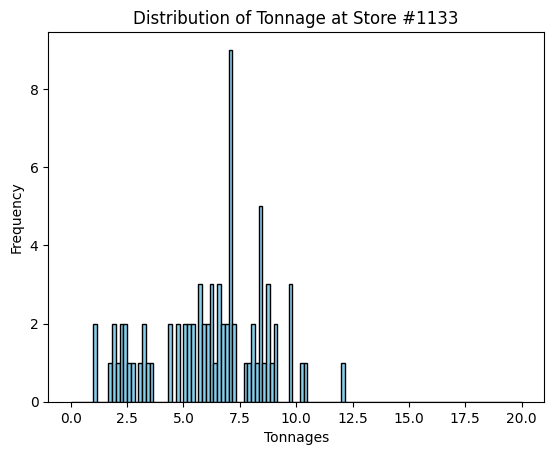

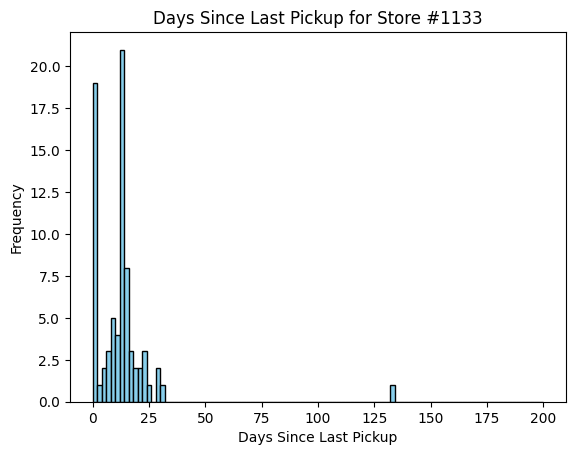

Location ID: 1841


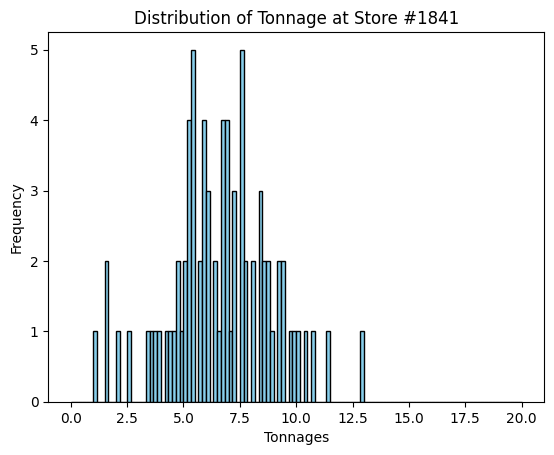

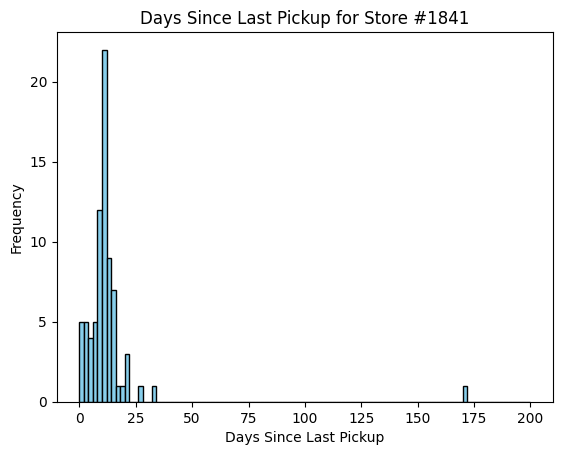

Location ID: 2135


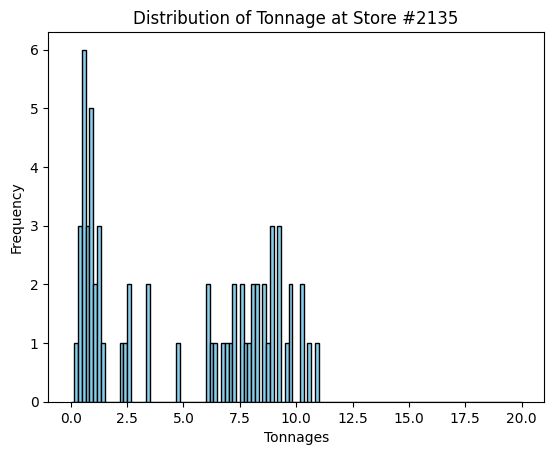

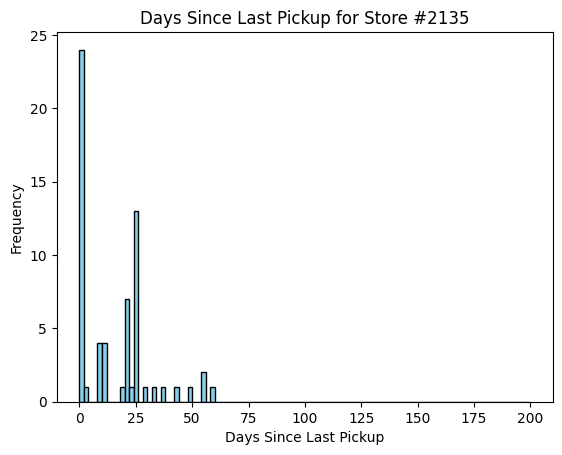

Location ID: 3336


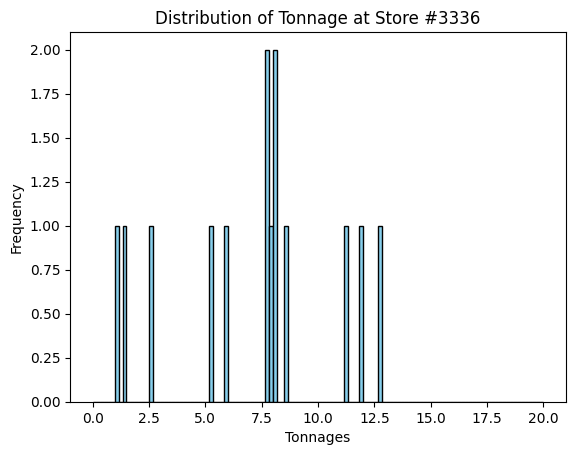

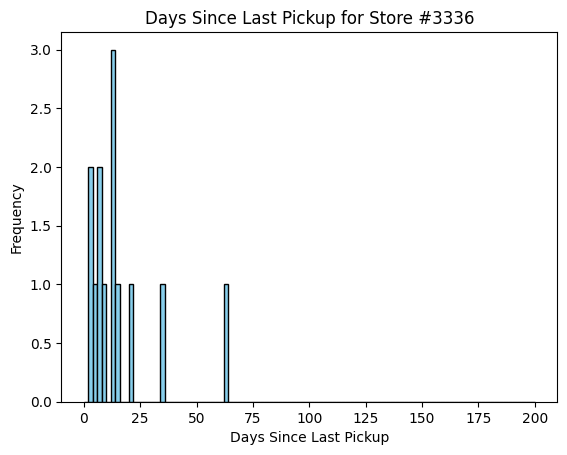

Location ID: 3858


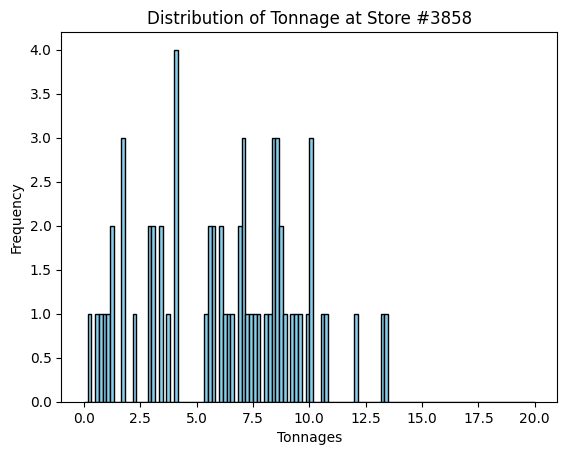

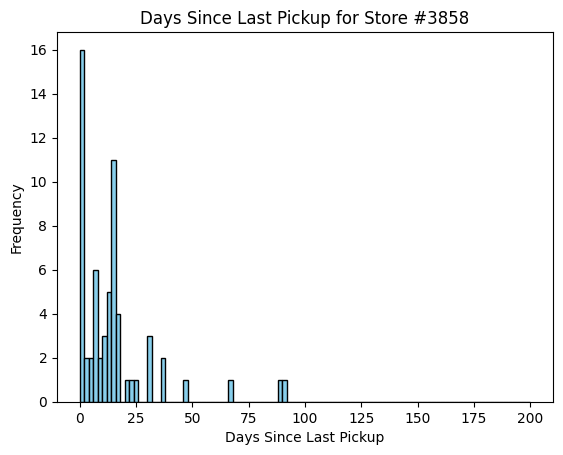

Location ID: 5220


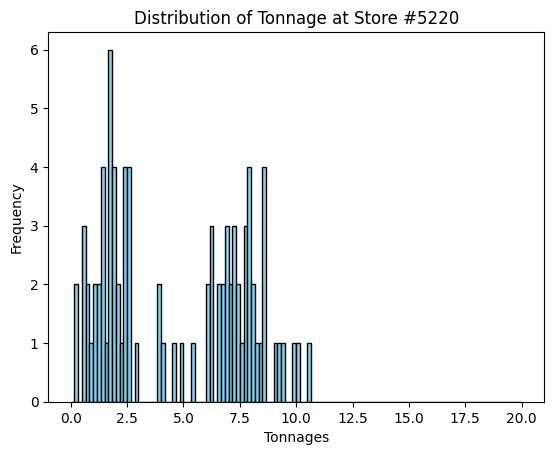

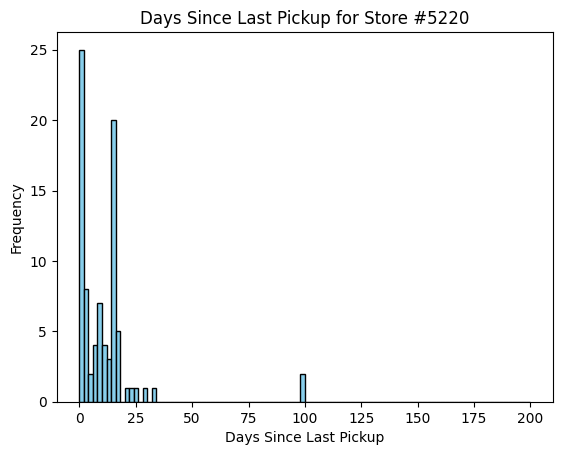

In [92]:
# Group by 'location_id'
grouped = supercenter_df.groupby('Location ID')

# Create a dictionary where keys are 'location_id' and values are the corresponding DataFrame group
location_dict = {location: group for location, group in grouped}

all_mean_ton = supercenter_df['Tonnage'].mean()
all_mean_pickup = supercenter_df['Days Since Last Pickup'].mean()
all_std_ton = supercenter_df['Tonnage'].std()
all_std_pickup = supercenter_df['Days Since Last Pickup'].std()

half_std_ton = all_std_ton/2
half_std_pickup = all_mean_pickup/2

relevant_stores = list()

# filtering for stores with similar mean and std tonnages + pickups to population
for location, data in location_dict.items():
    mean_ton = data['Tonnage'].mean()
    mean_pickup = data['Days Since Last Pickup'].mean()
    std_ton = data['Tonnage'].std()
    std_pickup = data['Days Since Last Pickup'].std()
    if mean_ton < all_mean_ton + half_std_ton and mean_ton > all_mean_ton - half_std_ton and mean_pickup < all_mean_pickup + half_std_pickup and mean_pickup > all_mean_pickup - half_std_pickup:
        if std_ton < all_std_ton + 15 and std_ton > all_std_ton - 15 and std_pickup < all_std_pickup + 6 and std_pickup > all_std_pickup - 6:
            relevant_stores.append(location)

print(relevant_stores)
# ignore
# print(all_mean_ton, all_mean_pickup, all_std_pickup, all_std_ton)

# Display the tonnage and pickup distribution of relevant stores
for location, data in location_dict.items():
    if location in relevant_stores:
        print(f"Location ID: {location}")
        plt.hist(data['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
        plt.xlabel('Tonnages')
        plt.ylabel('Frequency')
        plt.title(f"Distribution of Tonnage at Store #{location}")
        plt.show()
        plt.hist(data['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
        plt.xlabel('Days Since Last Pickup')
        plt.ylabel('Frequency')
        plt.title(f'Days Since Last Pickup for Store #{location}')
        plt.show()
